## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_data_complete['Mouse ID'].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. #G989 (0, 5, 10, 15, 20)
duplicate_timepoint=mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
duplicate_timepoint.count()

Mouse ID              5
Drug Regimen          5
Sex                   5
Age_months            5
Weight (g)            5
Timepoint             5
Tumor Volume (mm3)    5
Metastatic Sites      5
dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter_mouse_data = mouse_data_complete.loc[mouse_data_complete.duplicated(subset = ['Mouse ID', 'Timepoint']), 
                                            "Mouse ID"].unique()
cleaned_df=mouse_data_complete[mouse_data_complete['Mouse ID'].isin(filter_mouse_data)==False]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame. #should be 1880, 248 mice
cleaned_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
    #and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_filter=cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']]
regimen_grp=regimen_filter.groupby(['Drug Regimen'])#.describe()
#regimen_grp.head()

mean=regimen_grp.mean()
median=regimen_grp.median()
variance=regimen_grp.var()
std=regimen_grp.std()
sem=regimen_grp.sem()

#create a dictionary
data = {"Tumor Mean": mean['Tumor Volume (mm3)'],
                "Tumor Median": median['Tumor Volume (mm3)'],
                "Tumor Variance": variance['Tumor Volume (mm3)'],
                "Tumor Std Dev": std['Tumor Volume (mm3)'],
                "Tumor SEM": sem['Tumor Volume (mm3)']
                }

#create a datafram from the dictionary
tumor_summary_df=pd.DataFrame(data)
tumor_summary_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Assemble the resulting series into a single summary dataframe.
    # Aggregate using one or more operations over the specified axis.
    # Returns dataframe
tumor_agg=regimen_grp.agg(['mean', 'median', 'std', 'var', 'sem'])
tumor_agg

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

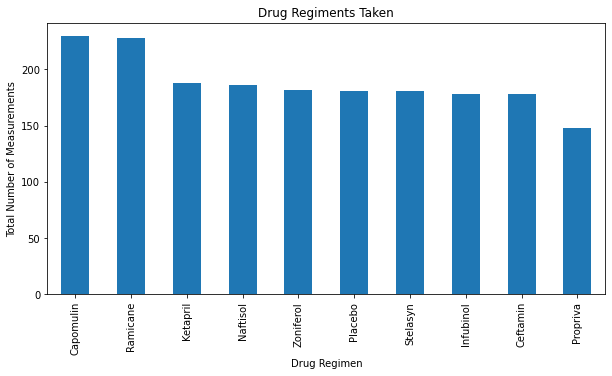

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Set a Title and labels

measurements_taken=cleaned_df["Drug Regimen"].value_counts()
measurements_taken.plot(kind='bar',figsize=(10,5))

plt.title("Drug Regiments Taken")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")


plt.show()

<BarContainer object of 10 artists>

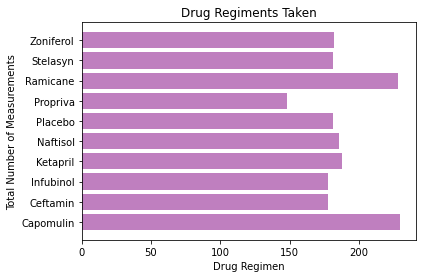

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurement_count=cleaned_df.groupby(['Drug Regimen']).count()['Tumor Volume (mm3)']
#measurement_count

y_axis=measurement_count.tolist()
x_axis=list(measurement_count.index)


plt.title("Drug Regiments Taken")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")


plt.barh(x_axis, y_axis, color='purple', alpha=.5, align='center')




In [13]:
gender_male=cleaned_df[(cleaned_df['Sex'] =='Male')].count()['Sex']
#gender_male

gender_female=cleaned_df[(cleaned_df['Sex'] =='Female')].count()['Sex']
#gender_female


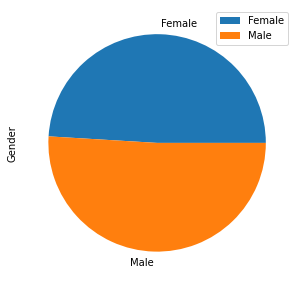

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df = pd.DataFrame({'Gender': [gender_female, gender_male]},
                 index=['Female', 'Male'])


plot = df.plot.pie(y='Gender', figsize=(5,5))



([<matplotlib.patches.Wedge at 0x1a660b67af0>,
 [Text(-0.79864235783093, -0.8956396509078041, 'female'),
  Text(0.7320888280116862, 0.8210030133321533, 'male')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

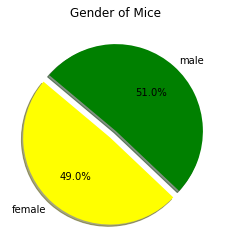

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['female', 'male']
gender_count = [gender_female, gender_male]
colors = ["yellow", "green"]
explode = (0.1, 0)

plt.title("Gender of Mice")

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#cleaned_df.head()

max_time_df=cleaned_df[['Mouse ID', 'Timepoint']].groupby('Mouse ID').max().reset_index() 
#max_time_df 

final_df=pd.merge(cleaned_df, max_time_df, how='inner', on=['Mouse ID', 'Timepoint'])
final_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

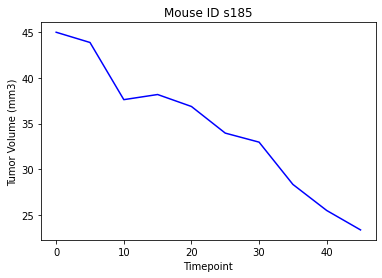

In [97]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df=cleaned_df[(cleaned_df['Drug Regimen'] =='Capomulin')]
#capomulin_df.head()

capomulin_s185 = capomulin_df[(capomulin_df['Mouse ID']== 's185')]
#capomulin_s185.head()

time_s185 = capomulin_s185['Timepoint']
volume_s185 = capomulin_s185['Tumor Volume (mm3)']

plt.plot(time_s185, volume_s185, color = 'blue')
plt.title("Mouse ID s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

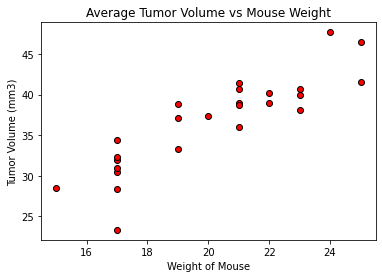

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_I509=final_df[(final_df['Drug Regimen'] =='Capomulin')]
#capomulin_filter.head()

weight = capomulin_filter['Weight (g)']
volume = capomulin_filter['Tumor Volume (mm3)']

plt.scatter(weight, volume, marker='o', facecolors='red', edgecolors='black')
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
